In [0]:
!unzip /content/detect-parkinsons.zip

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from skimage import feature
from imutils import paths
import numpy as np
import cv2
import os

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
def show_im(li):
  im = cv2.imread(li[0])
  print(li[1])
  cv2_imshow(im)
  cv2.waitKey(0)

Healthy


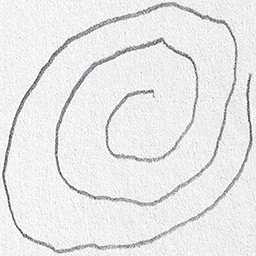

Parkinson


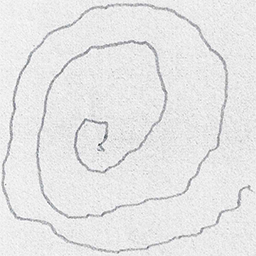

In [0]:
healthy_path = "/content/detect-parkinsons/dataset/spiral/training/healthy/V02HE02.png"
park_path = "/content/detect-parkinsons/dataset/spiral/training/parkinson/V03PE02.png"
check = [[healthy_path, "Healthy"], [park_path, "Parkinson"]]

for li in check:
  show_im(li)

In [0]:
def features_image(image):
	
	features = feature.hog(image, orientations=9,
		pixels_per_cell=(10, 10), cells_per_block=(2, 2),
		transform_sqrt=True, block_norm="L1")

	# return the feature vector
	return features

In [0]:
def get_data(path):
	
	imagePaths = list(paths.list_images(path))
	feature_data = []
	labels = []

	
	for imagePath in imagePaths:
		
		label = imagePath.split(os.path.sep)[-2]

		
		image = cv2.imread(imagePath)
		image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		image = cv2.resize(image, (200, 200))
		image = cv2.threshold(image, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

		
		features = features_image(image)

		
		feature_data.append(features)
		labels.append(label)

	
	return (np.array(feature_data), np.array(labels))

###Wave Test Classification

In [0]:
trainingPath = "/content/detect-parkinsons/dataset/wave"
testingPath =  "/content/detect-parkinsons/dataset/wave"

In [0]:
X_train, y_train = get_data(trainingPath)


In [0]:
X_test, y_test = get_data(testingPath)

In [0]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred = rf.predict(X_test)

In [0]:

(tn, fp, fn, tp) = confusion_matrix(y_test, pred).flatten()
acc = (tp+tn)/(float(tp+tn+fp+fn))
sen = tp/float(tp+fn)
spe = tn/float(tn+fp)

In [0]:
print("Test Accuracy = {}".format(acc))
print("Test Sensitivity = {}".format(sen))
print("Test Specificity = {}".format(spe))


Test Accuracy = 0.6333333333333333
Test Sensitivity = 0.6666666666666666
Test Specificity = 0.6


#### LightGBM

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
"""params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10"""
clf = lgb.train(params,d_train)

In [0]:
pred = clf.predict(X_test)

In [0]:
for i in range(len(pred)):
  if pred[i] >=0.5:
    pred[i] =1
  else:
    pred[i] =0

In [0]:
(tn, fp, fn, tp) = confusion_matrix(y_test, pred).flatten()
acc = (tp+tn)/(float(tp+tn+fp+fn))
sen = tp/float(tp+fn)
spe = tn/float(tn+fp)

In [0]:
print("Test Accuracy = {}".format(acc))
print("Test Sensitivity = {}".format(sen))
print("Test Specificity = {}".format(spe))


Test Accuracy = 0.6666666666666666
Test Sensitivity = 0.7333333333333333
Test Specificity = 0.6


#### CatBoost

In [0]:
!pip install catboost

In [0]:
from catboost import CatBoostClassifier
mod = CatBoostClassifier(use_best_model=True, task_type="GPU")
mod.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.059193
0:	learn: 0.6433792	test: 0.6907393	best: 0.6907393 (0)	total: 161ms	remaining: 2m 40s
1:	learn: 0.5989252	test: 0.6755182	best: 0.6755182 (1)	total: 277ms	remaining: 2m 18s
2:	learn: 0.5517846	test: 0.6598527	best: 0.6598527 (2)	total: 382ms	remaining: 2m 6s
3:	learn: 0.5009847	test: 0.6396966	best: 0.6396966 (3)	total: 457ms	remaining: 1m 53s
4:	learn: 0.4719402	test: 0.6373657	best: 0.6373657 (4)	total: 529ms	remaining: 1m 45s
5:	learn: 0.4383774	test: 0.6297883	best: 0.6297883 (5)	total: 603ms	remaining: 1m 39s
6:	learn: 0.4021271	test: 0.6066343	best: 0.6066343 (6)	total: 675ms	remaining: 1m 35s
7:	learn: 0.3620974	test: 0.6055097	best: 0.6055097 (7)	total: 751ms	remaining: 1m 33s
8:	learn: 0.3472208	test: 0.6164207	best: 0.6055097 (7)	total: 827ms	remaining: 1m 31s
9:	learn: 0.3334282	test: 0.6208566	best: 0.6055097 (7)	total: 896ms	remaining: 1m 28s
10:	learn: 0.3180355	test: 0.6148739	best: 0.6055097 (7)	total: 966ms	remaining: 1m 26s
11:	learn: 0.

In [0]:
pred = mod.predict(X_test)

In [0]:
(tn, fp, fn, tp) = confusion_matrix(y_test, pred).flatten()
acc = (tp+tn)/(float(tp+tn+fp+fn))
sen = tp/float(tp+fn)
spe = tn/float(tn+fp)

In [0]:
print("Test Accuracy = {}".format(acc))
print("Test Sensitivity = {}".format(sen))
print("Test Specificity = {}".format(spe))


Test Accuracy = 0.6666666666666666
Test Sensitivity = 0.7333333333333333
Test Specificity = 0.6


#### MLPClassifier of sklearn

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
net = MLPClassifier(random_state=42)
for i in range(100):
  print("Training for Epoch {}".format(i+1))
  net.fit(X_train, y_train)

Training for Epoch 1
Training for Epoch 2
Training for Epoch 3
Training for Epoch 4
Training for Epoch 5
Training for Epoch 6
Training for Epoch 7
Training for Epoch 8
Training for Epoch 9
Training for Epoch 10
Training for Epoch 11
Training for Epoch 12
Training for Epoch 13
Training for Epoch 14
Training for Epoch 15
Training for Epoch 16
Training for Epoch 17
Training for Epoch 18
Training for Epoch 19
Training for Epoch 20
Training for Epoch 21
Training for Epoch 22
Training for Epoch 23
Training for Epoch 24
Training for Epoch 25
Training for Epoch 26
Training for Epoch 27
Training for Epoch 28
Training for Epoch 29
Training for Epoch 30
Training for Epoch 31
Training for Epoch 32
Training for Epoch 33
Training for Epoch 34
Training for Epoch 35
Training for Epoch 36
Training for Epoch 37
Training for Epoch 38
Training for Epoch 39
Training for Epoch 40
Training for Epoch 41
Training for Epoch 42
Training for Epoch 43
Training for Epoch 44
Training for Epoch 45
Training for Epoch 

In [0]:
pred = net.predict(X_test)

In [0]:
(tn, fp, fn, tp) = confusion_matrix(y_test, pred).flatten()
acc = (tp+tn)/(float(tp+tn+fp+fn))
sen = tp/float(tp+fn)
spe = tn/float(tn+fp)

In [0]:
print("Test Accuracy = {}".format(acc))
print("Test Sensitivity = {}".format(sen))
print("Test Specificity = {}".format(spe))


Test Accuracy = 0.7
Test Sensitivity = 0.6666666666666666
Test Specificity = 0.7333333333333333


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
train_data = ImageDataBunch.from_folder(path=trainingPath, train='training', valid='testing', size=224)

In [0]:
train_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /content/detect-parkinsons/dataset/wave;

Valid: LabelList (30 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /content/detect-parkinsons/dataset/wave;

Test: None

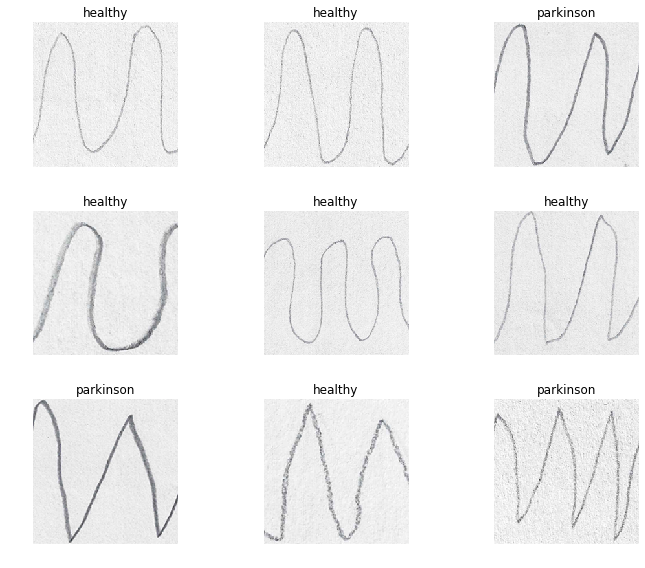

In [0]:
train_data.show_batch(rows=3, figsize=(10,8))

In [0]:
learn = cnn_learner(train_data, models.resnet50, metrics=accuracy)

In [0]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.967170,0.758019,0.466667,00:02
1,0.862759,0.766851,0.466667,00:02
2,0.706527,0.774117,0.500000,00:02
3,0.592795,0.813737,0.500000,00:02
4,0.489976,0.854143,0.633333,00:02
5,0.407344,0.878808,0.666667,00:02
6,0.347138,0.931844,0.700000,00:02
7,0.301491,0.967656,0.700000,00:02
8,0.265842,1.011184,0.733333,00:02
9,0.237076,1.026904,0.766667,00:02


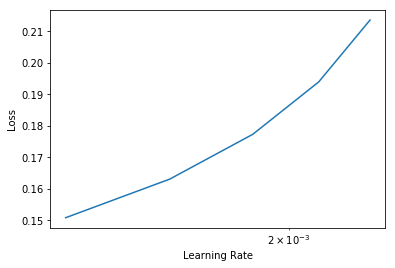

In [0]:
learn.recorder.plot()

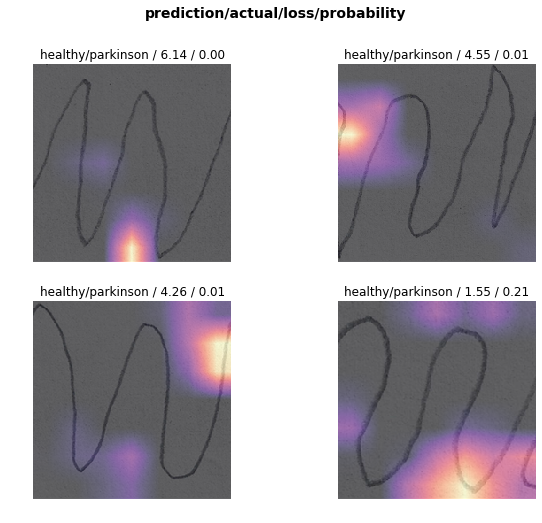

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,8))

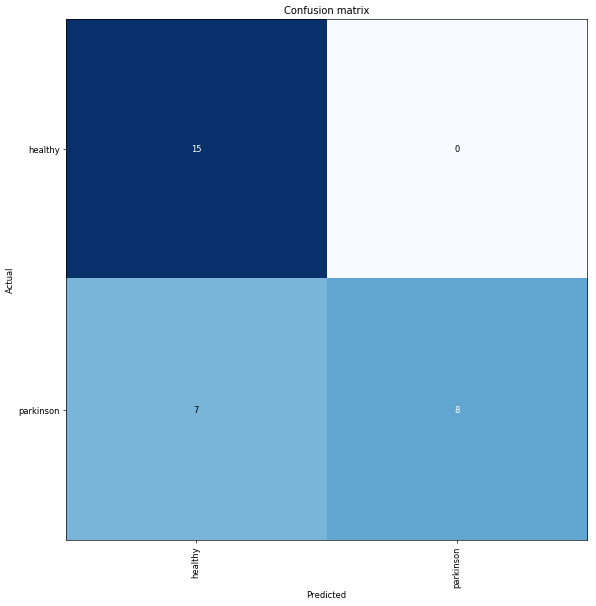

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

Test Accuracy = 0.766667

Test Sensitivity = 1.0

Test Specificity = 0.5333

Using Histgram of Orient Gradients, Test accuracy obtained is about 66 % with Sensitivity 73% and Specificity 60% using CatBoost and LightGBM.

Test Accuracy obtained is 70% with Sensitivity 66% and Specificity 73% using MLPClassifier from sklearn.

Fastai provided best result using pre-trained ResNet model with about 77% Accuracy and Sensitivity of 100%